<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/3CHECKPOINT_ToDo_CP_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0])) #?? hichem what's happening here?
    test_y = test_y.reshape((1, test_y.shape[0])) #?? hichem what's happening here?

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset +Data Preprocessing and Data Augmentation

How do you reshape a NumPy array from 2D to 3D?
hope this funtion helps u to convert 2D array to 3D array. If you just want to add a 3rd axis (x,y) to (x,y,1), Numpy allows you to easily do this using the dstack command. You need to transpose ( . T ) it to get it into the (x,y,1) format you want.

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize x : image vectors :re-scale the image data to values between [0,1] : 255. :type('float32')
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape = Flatten : each row become column

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape)) 
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape)) 
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Data augmentation on the train data:



```
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train) 


# RESHAPE / .T
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)
```



In [ ]:
Y_test# there's no need for one hot encoding :to categorica seeing 0 and 1 
# no need to convert class vectors to binary class matrices 
#like the first checkpoint (labels) :train_labels_categ/test_labels_categ/validation_labels_categ


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

Image shape : (64, 64, 3)


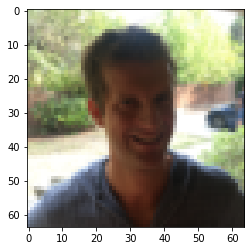

In [ ]:
# Sample image from dataset NUMBER 9
print("Image shape :",X_train_orig[9].shape)
imshow(X_train_orig[9])

Image shape : (64, 64, 3)


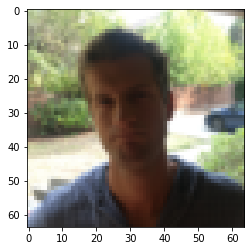

In [ ]:
# Sample image from dataset NUMBER 10
print("Image shape :",X_train_orig[10].shape) 
imshow(X_train_orig[10])

Visualize the data 
Let’s visualize our data and see what exactly we are working with. We use seaborn to plot the number of images in both the classes and you can see what the output looks like. BASED ON THIS EXP / 
https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

# ⚗ fix this henda



```
l = []
for i in  X_train_orig:
  if(i[1] == 0):
    l.append("happy")
  else:
    l.append("not_happy")
sns.set_style('darkgrid')
sns.countplot(l)

# i was trying to creat to plot the number of images in both 
 classes and you can see what the output looks like. why it didn't work? 

#how to to create histogram to see the number of images in both classes ?

```



# Building Model :


- Define the Model 

Let’s define a simple CNN model with 1 Convolutional layers followed by max-pooling layers. A dropout layer is added after the 3rd maxpool operation to avoid overfitting.

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


**exp**

```
cnn_model = Sequential() #Specifying the input shape

cnn_model.add(Conv2D(64, 6, 6, input_shape = (64,64,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, 5, 5, activation='relu'))
#cnn_model.add(MaxPooling2D(pool_size = (2, 2),padding="VALID",strides=(1, 2, 2, 1)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))```



_________________________________________________________________

> Bloc en retrait



conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
model = Sequential() #Specifying the input shape

#covolution layer
model.add(Conv2D(filters=32, kernel_size=(7,7),activation='relu',padding="same",input_shape=(64,64,3) ))#input: for 64x64 RGB pictures , (4, 62, 62, 2)>>> # With `dilation_rate` as 2. 
#try "valid" ,try kernel_size=(3,3) ,change activation too 

#BatchNormalization
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))#pool_size=(2,2),strides=1
#Flatten
model.add(Flatten())
# Densely connected layers
#model.add(Dense(128, activation = 'relu'))
# output layer
model.add(Dense(1, activation = 'sigmoid')) #softmax or sigmoid              


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-traina

In [ ]:
    # compile with adam optimizer & binary_crossentropy loss function

opt ='Adam' #tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])#

In [ ]:
history_model = model.fit(X_train, Y_train,epochs=10,batch_size=16) #model.fit(X_train, Y_train, epochs=40, batch_size=50) , is 5 and 0.9550 acc enough  ? 


Epoch 1/10
38/38 [==============================] - 5s 111ms/step - loss: 0.8897 - accuracy: 0.6867
Epoch 2/10
38/38 [==============================] - 4s 109ms/step - loss: 0.2466 - accuracy: 0.9167
Epoch 3/10
38/38 [==============================] - 4s 110ms/step - loss: 0.1530 - accuracy: 0.9467
Epoch 4/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1124 - accuracy: 0.9617
Epoch 5/10
38/38 [==============================] - 4s 110ms/step - loss: 0.1320 - accuracy: 0.9517
Epoch 6/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1009 - accuracy: 0.9733
Epoch 7/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1081 - accuracy: 0.9650
Epoch 8/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0819 - accuracy: 0.9783
Epoch 9/10
38/38 [==============================] - 4s 110ms/step - loss: 0.0545 - accuracy: 0.9867
Epoch 10/10
38/38 [==============================] - 5s 124ms/step - loss: 0.0592 - accuracy: 0.9817

FOR EPOCHS =5 

accuracy : 0.9550  now here is the thing this test gave us the 

FOR EPOCHS =10

accuracy: 0.9833



# Evaluate / Test

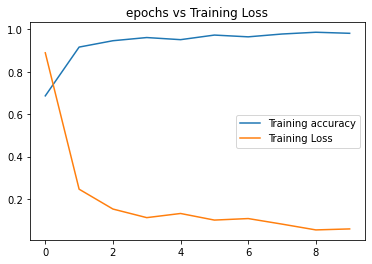

In [ ]:
train_accuracy = history_model.history['accuracy']# val_accuracy
train_loss = history_model.history['loss']# val_loss
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [ ]:
#Scoring of model on training and test data
#maybe changing architecture for better res
scores = model.evaluate(X_train, Y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, Y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

19/19 [==============================] - 1s 68ms/step - loss: 0.1038 - accuracy: 0.9717
Training Accuracy: 97.17%

5/5 [==============================] - 0s 67ms/step - loss: 0.2118 - accuracy: 0.9000
Testing Accuracy: 90.00%



In [ ]:
#or 
score = model.evaluate(X_train,Y_train, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.971666693687439


In [ ]:
test_logits = model.predict(X_test) #EXPAIN

In [ ]:
test_predictions = np.argmax(test_logits, axis=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred 

array([[0.9948189 ],
       [0.83037925],
       [0.9875564 ],
       [0.99084175],
       [0.18865317],
       [0.76052594],
       [0.64425355],
       [0.01095265],
       [0.9137851 ],
       [0.03252658],
       [0.7372428 ],
       [0.03710252],
       [0.60770947],
       [0.27608567],
       [0.03381538],
       [0.6759437 ],
       [0.00350103],
       [0.8612707 ],
       [0.00427124],
       [0.9980128 ],
       [0.7489922 ],
       [0.8321701 ],
       [0.23895532],
       [0.99686915],
       [0.00505504],
       [0.00491431],
       [0.46593815],
       [0.02192065],
       [0.28220063],
       [0.9337603 ],
       [0.89635336],
       [0.9784657 ],
       [0.61196595],
       [0.97634786],
       [0.8856512 ],
       [0.9769566 ],
       [0.11448175],
       [0.07680938],
       [0.04758307],
       [0.0104464 ],
       [0.42916125],
       [0.01152331],
       [0.10763466],
       [0.00994781],
       [0.99907947],
       [0.00389099],
       [0.00606576],
       [0.006

WHY OUTPUT IS THIS WAY AND float32 ?? The model outputs the predicted probabilities 
you need to transform them back to class labels before calculating the classification metrics, see below.

https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

# ⚗ fix this henda

Confusion Matrix

In [ ]:
# extract the predicted probabilities
#y_pred = y_pred.flatten()
print(y_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(y_pred > 0.5, 1, 0)
print(y_pred)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

print(confusion_matrix(Y_test, y_pred))
# [[13  1]
#  [ 2  9]]

[[0.99]
 [0.83]
 [0.99]
 [0.99]
 [0.19]
 [0.76]
 [0.64]
 [0.01]
 [0.91]
 [0.03]
 [0.74]
 [0.04]
 [0.61]
 [0.28]
 [0.03]
 [0.68]
 [0.  ]
 [0.86]
 [0.  ]
 [1.  ]
 [0.75]
 [0.83]
 [0.24]
 [1.  ]
 [0.01]
 [0.  ]
 [0.47]
 [0.02]
 [0.28]
 [0.93]
 [0.9 ]
 [0.98]
 [0.61]
 [0.98]
 [0.89]
 [0.98]
 [0.11]
 [0.08]
 [0.05]
 [0.01]
 [0.43]
 [0.01]
 [0.11]
 [0.01]
 [1.  ]
 [0.  ]
 [0.01]
 [0.01]
 [0.94]
 [0.01]
 [0.  ]
 [0.08]
 [0.49]
 [0.35]
 [0.05]
 [0.94]
 [0.86]
 [0.49]
 [0.96]
 [1.  ]
 [0.35]
 [0.96]
 [0.29]
 [0.46]
 [0.99]
 [0.2 ]
 [0.39]
 [0.71]
 [0.88]
 [0.99]
 [0.95]
 [0.06]
 [0.02]
 [0.13]
 [0.08]
 [0.59]
 [0.51]
 [0.01]
 [0.1 ]
 [0.96]
 [0.08]
 [0.97]
 [0.07]
 [1.  ]
 [0.18]
 [0.78]
 [0.9 ]
 [0.01]
 [0.03]
 [1.  ]
 [0.04]
 [0.08]
 [0.09]
 [0.01]
 [0.86]
 [0.17]
 [0.92]
 [0.05]
 [1.  ]
 [0.72]
 [1.  ]
 [0.09]
 [1.  ]
 [0.04]
 [0.02]
 [0.02]
 [0.01]
 [0.91]
 [0.02]
 [0.01]
 [1.  ]
 [0.97]
 [0.03]
 [0.17]
 [0.99]
 [0.81]
 [0.16]
 [0.11]
 [1.  ]
 [0.03]
 [0.66]
 [0.99]
 [0.05]
 [1.  ]
 [0.35]


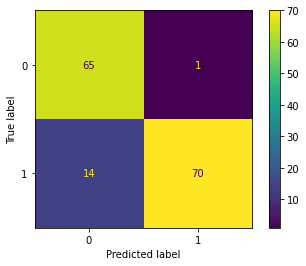

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

INTERPRET?

NICE BUT NOT ENOUGH 

# Note

Before you submit your work 

* You should compare different optimizers:
( adam , memntum, rmsprop , ..)
adam vs sgd vs rmsprop vs mementum vs ..

https://stats.stackexchange.com/questions/315743/rmsprop-and-adam-vs-sgd

In [ ]:
opt = 'RMSprop'
#opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss ="binary_crossentropy" , metrics = ['accuracy'])

Epoch 1/10
38/38 [==============================] - 5s 108ms/step - loss: 0.1985 - accuracy: 0.9367
Epoch 2/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1220 - accuracy: 0.9583
Epoch 3/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0813 - accuracy: 0.9700
Epoch 4/10
38/38 [==============================] - 4s 110ms/step - loss: 0.0715 - accuracy: 0.9750
Epoch 5/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0626 - accuracy: 0.9783
Epoch 6/10
38/38 [==============================] - 4s 108ms/step - loss: 0.0507 - accuracy: 0.9833
Epoch 7/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0673 - accuracy: 0.9850
Epoch 8/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0547 - accuracy: 0.9783
Epoch 9/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0337 - accuracy: 0.9933
Epoch 10/10
38/38 [==============================] - 4s 108ms/step - loss: 0.0369 - accuracy: 0.9867

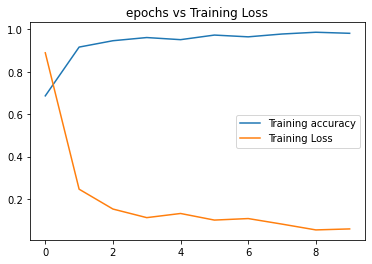

In [ ]:
history = model.fit(X_train, Y_train,epochs=10,batch_size=16) #x_test =validation
#Scoring of model on training and test data
#maybe changing architecture for better res

train_accuracy = history_model.history['accuracy']# val_accuracy
train_loss = history_model.history['loss']# val_loss
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
print()
scores = model.evaluate(X_train, Y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, Y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

In [ ]:
opt = 'SGD'
#opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss ="binary_crossentropy" , metrics = ['accuracy'])

Epoch 1/5
19/19 [==============================] - 5s 227ms/step - loss: 0.0142 - accuracy: 0.9983 - val_loss: 0.0861 - val_accuracy: 0.9600
Epoch 2/5
19/19 [==============================] - 4s 218ms/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0931 - val_accuracy: 0.9667
Epoch 3/5
19/19 [==============================] - 4s 218ms/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 0.0845 - val_accuracy: 0.9600
Epoch 4/5
19/19 [==============================] - 4s 219ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0850 - val_accuracy: 0.9667
Epoch 5/5
19/19 [==============================] - 4s 217ms/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0794 - val_accuracy: 0.9667


19/19 [==============================] - 1s 67ms/step - loss: 0.0084 - accuracy: 0.9983
Training Accuracy: 99.83%

5/5 [==============================] - 0s 71ms/step - loss: 0.0794 - accuracy: 0.9667
Testing Accuracy: 96.67%



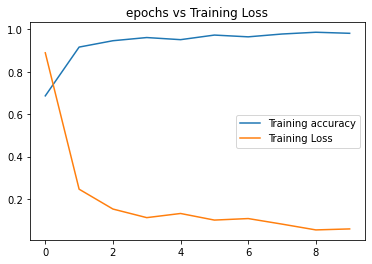

In [ ]:
history = model.fit(X_train,Y_train,epochs = 5 , validation_data = (X_test, Y_test),) #X_test, Y_test =X ET Y validation
#Scoring of model on training and test data
print()
train_accuracy = history_model.history['accuracy']# val_accuracy
train_loss = history_model.history['loss']# val_loss
count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
print()
scores = model.evaluate(X_train, Y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, Y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

# Note

* Display images with Predicted & expected labels (Happy-sad)


i followed this tuto of soccer/rugby Classifier 

https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

# ⚗fix this henda

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

y_pred.reshape(1,-1)[0]

print(classification_report(Y_test, y_pred, target_names = ['HAPPY (Class 0)','NOT_HAPPY (Class 1)']))

                     precision    recall  f1-score   support

    HAPPY (Class 0)       0.82      0.98      0.90        66
NOT_HAPPY (Class 1)       0.99      0.83      0.90        84

           accuracy                           0.90       150
          macro avg       0.90      0.91      0.90       150
       weighted avg       0.91      0.90      0.90       150



#CAN U PlEASE GIVE ME THE CODE FOR THE lAST PART I COUlD'T DO MORE ... time is running  :) ! 

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(X_train[img_index], cmap=plt.cm.gray)
    


    actual_label = int(X_train) #train_labels_categ
    predicted_label = int(y_pred) #yes
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
    actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label] 
    #numerical_label = train_labels[random_index]
    #text_description = text_labels[numerical_label]
    ))
    
plt.tight_layout()
plt.show()